# MEC Road Race 1 Pacing Data
### Can't see the graphs? Try viewing them [here](https://nbviewer.jupyter.org/github/jimprince/analysis/blob/master/MEC_Race_Pacing/MEC_Race.ipynb?flush_cache=true)

Key Question: To graduate from a 5K to a 10K, and a 10K to a 21K, is it more important to focus on keeping the same pace longer or to speed up your pace?

Answer: From the data it seems that from 5K to 10K there is a major difference in pace, moving from a mean of 6.8min/km to a mean of 5.6min/km. That translates to the average person running a 10K will run a 5K at least 5 mintues faster (and probably even faster becasue they could maintain a faster pace for less time) than the average 5k participant.

In [42]:
!ls

10km.CSV           5km.CSV            styling-names.html
21km.CSV           MEC_Race.ipynb


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.offline import iplot
%matplotlib inline
offline.init_notebook_mode(connected=True)

In [2]:
column_names = ["e", "place", "name", "div", "time", "bib", "d", "c", "b", "a", "pace_km", "pace_miles"]
five =  pd.read_csv("5km.CSV", names=column_names)
ten =  pd.read_csv("10km.CSV", names=column_names)
half =  pd.read_csv("21km.CSV", names=column_names)

In [3]:
# Implementation of the Arduino map function, b/c I guess it doesn't exist in python
def map(x, in_min, in_max, out_min, out_max):
    return round((x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min)

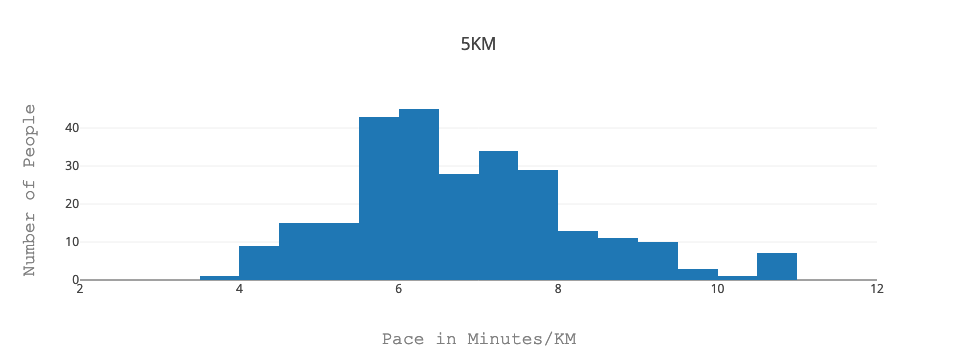

i'm done


In [6]:
races = [five, ten, half]
races_str = ["5KM", "10KM", "21KM"]

for race, race_str in zip(races, races_str):
    new = race["pace_km"].str.split(":", n = 1, expand = True)
    new.columns = ["m", "s"]
    new.s = pd.to_numeric(new.s)
    new.m = pd.to_numeric(new.m)
    race["pace_s"] = new.m * 60 + new.s
    race["pace_m"] = race.pace_s / 60.0
    data = [go.Histogram(x=race["pace_m"])]
    layout = go.Layout(
        autosize=False,
        width=700,
        height=300,
        title=race_str,
            xaxis=dict(
                range=[2, 12],
                title='Pace in Minutes/KM',
                titlefont=dict(
                    family='Courier New, monospace',
                    size=18,
                    color='#7f7f7f'
                )
            ),
            yaxis=dict(
                title='Number of People',
                titlefont=dict(
                    family='Courier New, monospace',
                    size=18,
                    color='#7f7f7f'
                )
            )
        )
    fig = go.Figure(data=data, layout=layout)
    offline.iplot(fig)
    break
#     print(f'For the {race_str} race the average pace was \nMean:{round(race["pace_m"].mean(), 2)} min/km \t Median: {round(race["pace_m"].median(), 2)} min/km\n')

print("i'm done")
